<a href="https://colab.research.google.com/github/xoxonut/DL_2024_Fall/blob/main/DL_HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
num_classes = 10
input_shape = (28, 28, 1)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [2]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation="relu",name='Conv2D_1'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation="relu",name='Conv2D_2'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax",name='Dense'),
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
class TestLossCallback(tf.keras.callbacks.Callback):
  def __init__(self, test_data):
    super().__init__()
    self.test_data = test_data
    self.batch_size = None
  def on_train_begin(self, logs):
    self.batch_size = self.params.get('batch_size')
  def on_epoch_end(self, epoch, logs):
    _, test_accuracy = self.model.evaluate(
        self.test_data[0],
        self.test_data[1],
        batch_size=self.batch_size,
        verbose=0
        )
    logs['test_accuracy'] = test_accuracy


In [4]:
batch_size = 128
epochs = 5
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.084,
    callbacks = [TestLossCallback((x_test, y_test))]
)


Epoch 1/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.7694 - loss: 0.7590 - val_accuracy: 0.9790 - val_loss: 0.0732 - test_accuracy: 0.9764
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9641 - loss: 0.1171 - val_accuracy: 0.9869 - val_loss: 0.0509 - test_accuracy: 0.9824
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9752 - loss: 0.0800 - val_accuracy: 0.9895 - val_loss: 0.0405 - test_accuracy: 0.9858
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.9790 - loss: 0.0681 - val_accuracy: 0.9903 - val_loss: 0.0360 - test_accuracy: 0.9886
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0.9909 - val_loss: 0.0344 - test_accuracy: 0.9893


In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03297004476189613
Test accuracy: 0.989300012588501


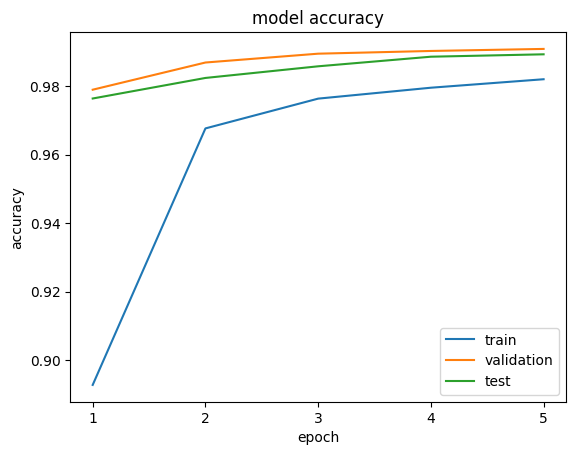

In [6]:
iterate = range(1, epochs+1)
plt.xticks(iterate)
plt.plot(iterate, history.history['accuracy'],)
plt.plot(iterate, history.history['val_accuracy'])
plt.plot(iterate, history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation','test'])
plt.show()


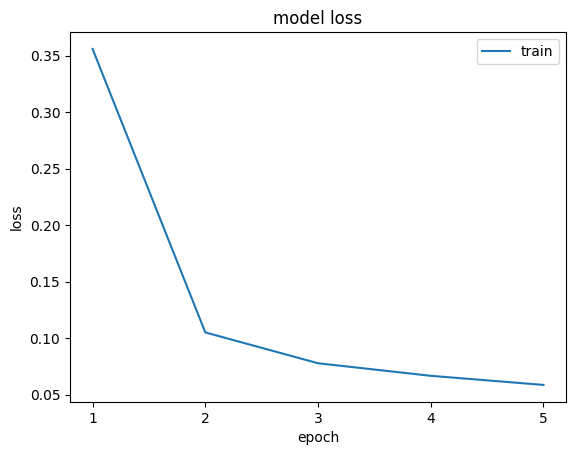

In [7]:
plt.xticks(iterate)
plt.plot(iterate, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()


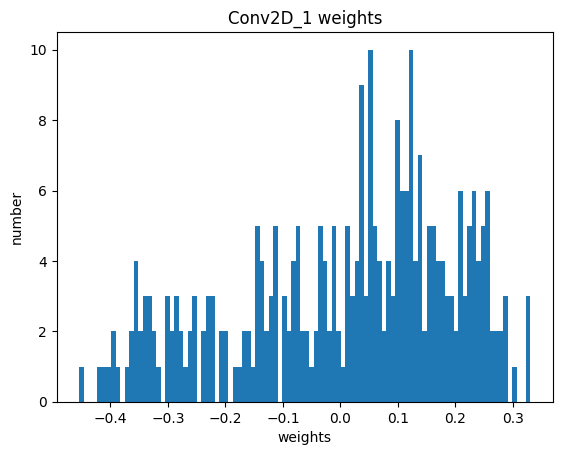

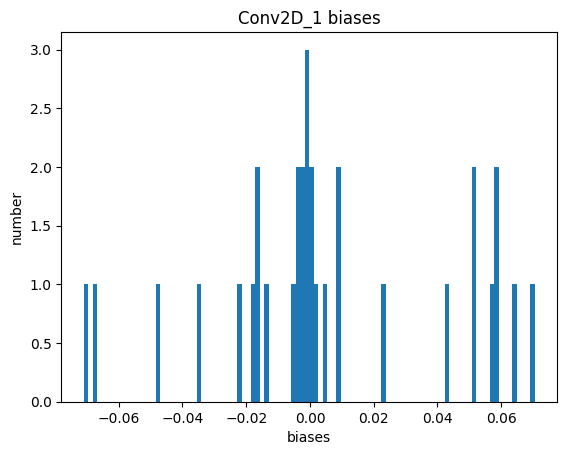

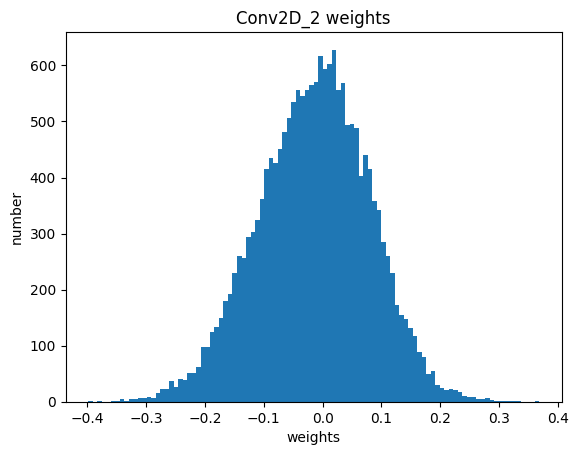

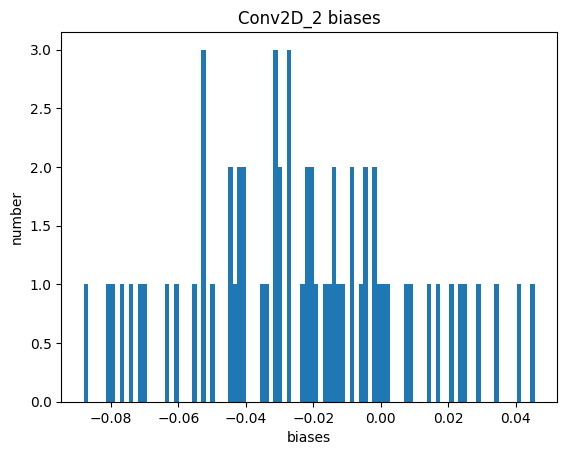

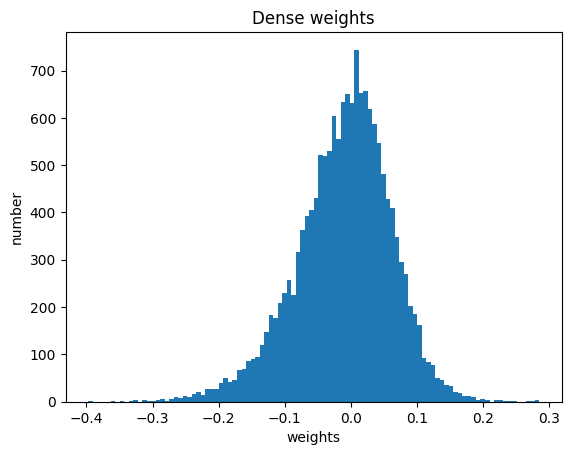

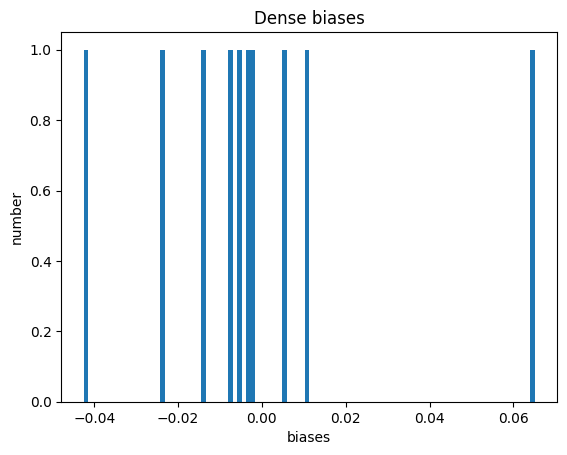

In [8]:
W = model.get_weights()
for layer in model.layers:
    w = layer.get_weights()
    if w:
      plt.hist(w[0].flatten(),bins=100)
      plt.title(f'{layer.name} weights')
      plt.xlabel('weights')
      plt.ylabel('number')
      plt.show()
      plt.hist(w[1].flatten(),bins=100)
      plt.title(f'{layer.name} biases')
      plt.xlabel('biases')
      plt.ylabel('number')
      plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Label: 7
Predict: 7


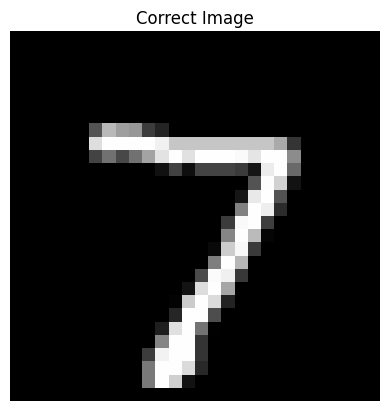

Layer 1 feature map shape: (1, 26, 26, 32)


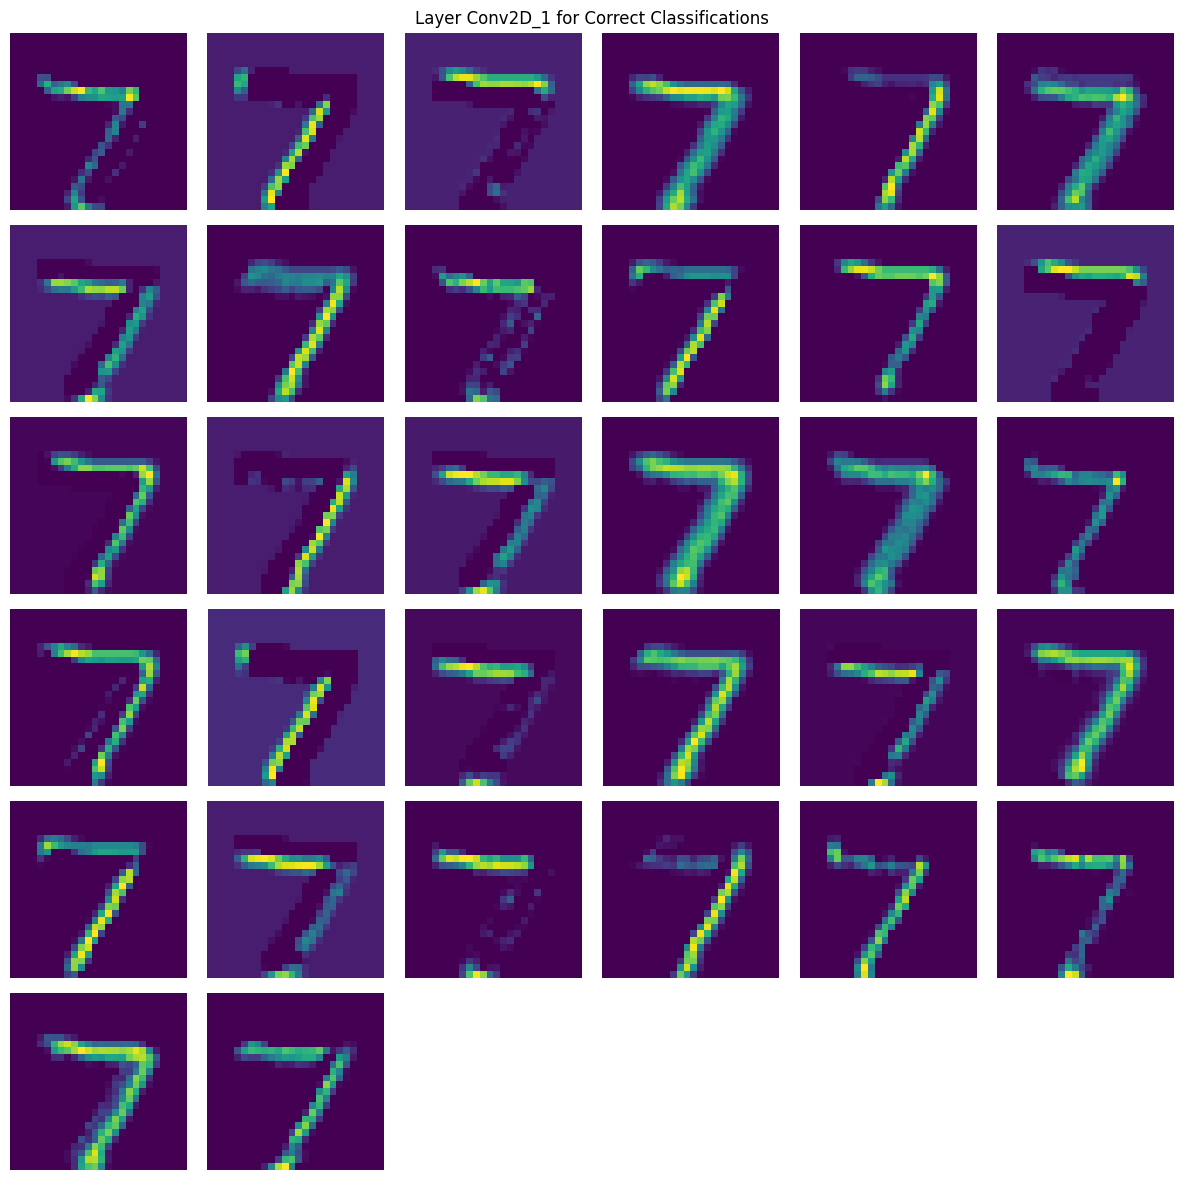

Layer 2 feature map shape: (1, 11, 11, 64)


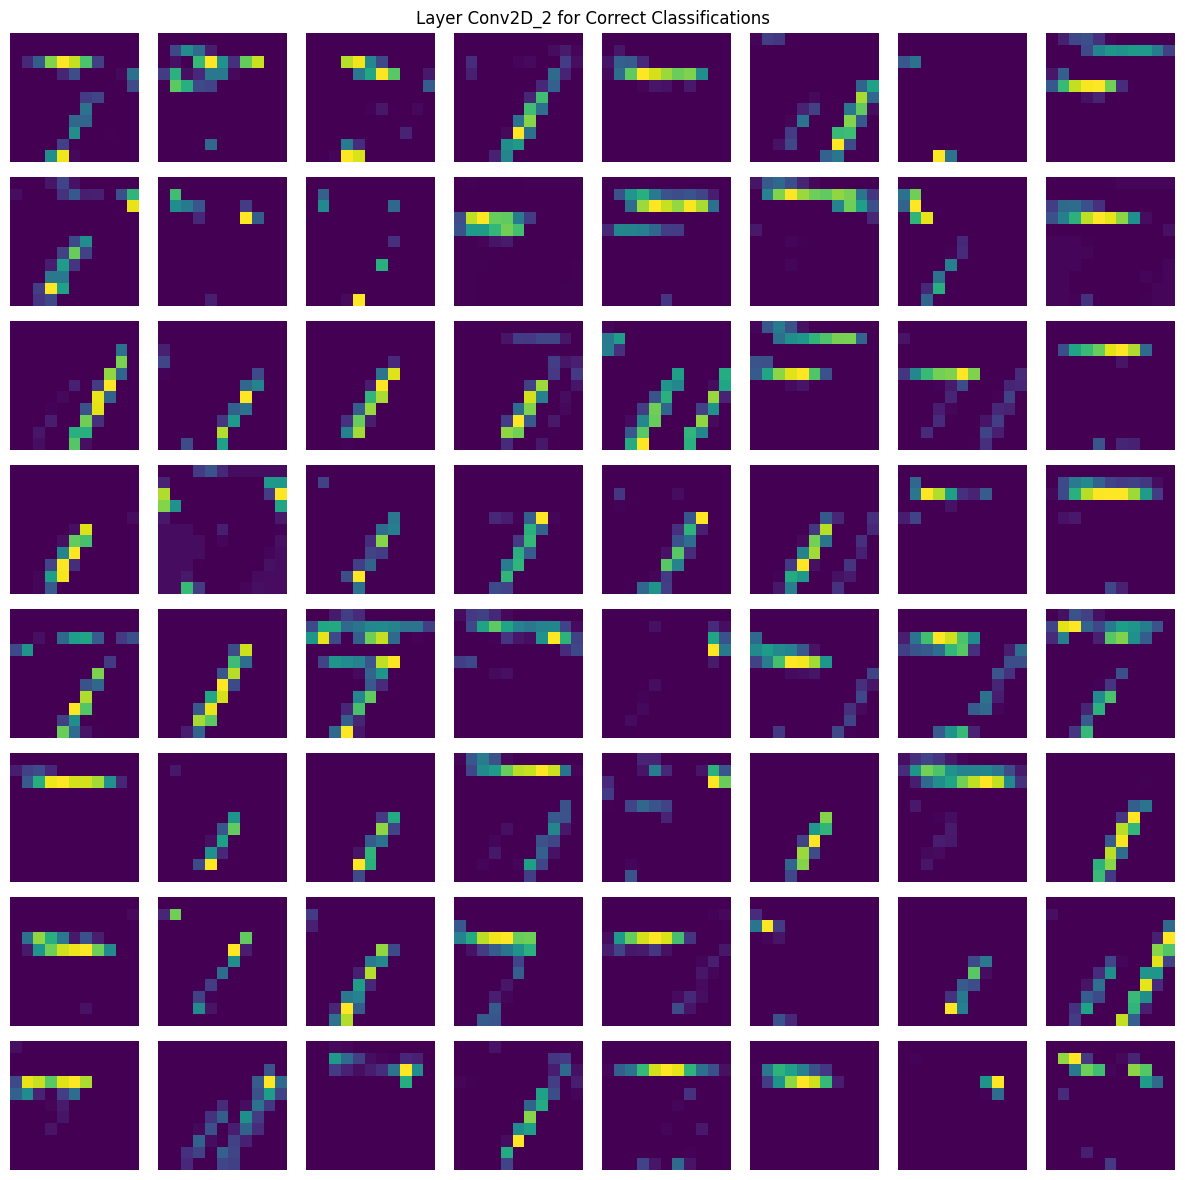

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Label: 7
Predict: 2


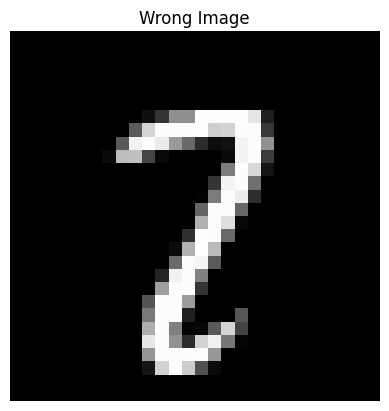

Layer 1 feature map shape: (1, 26, 26, 32)


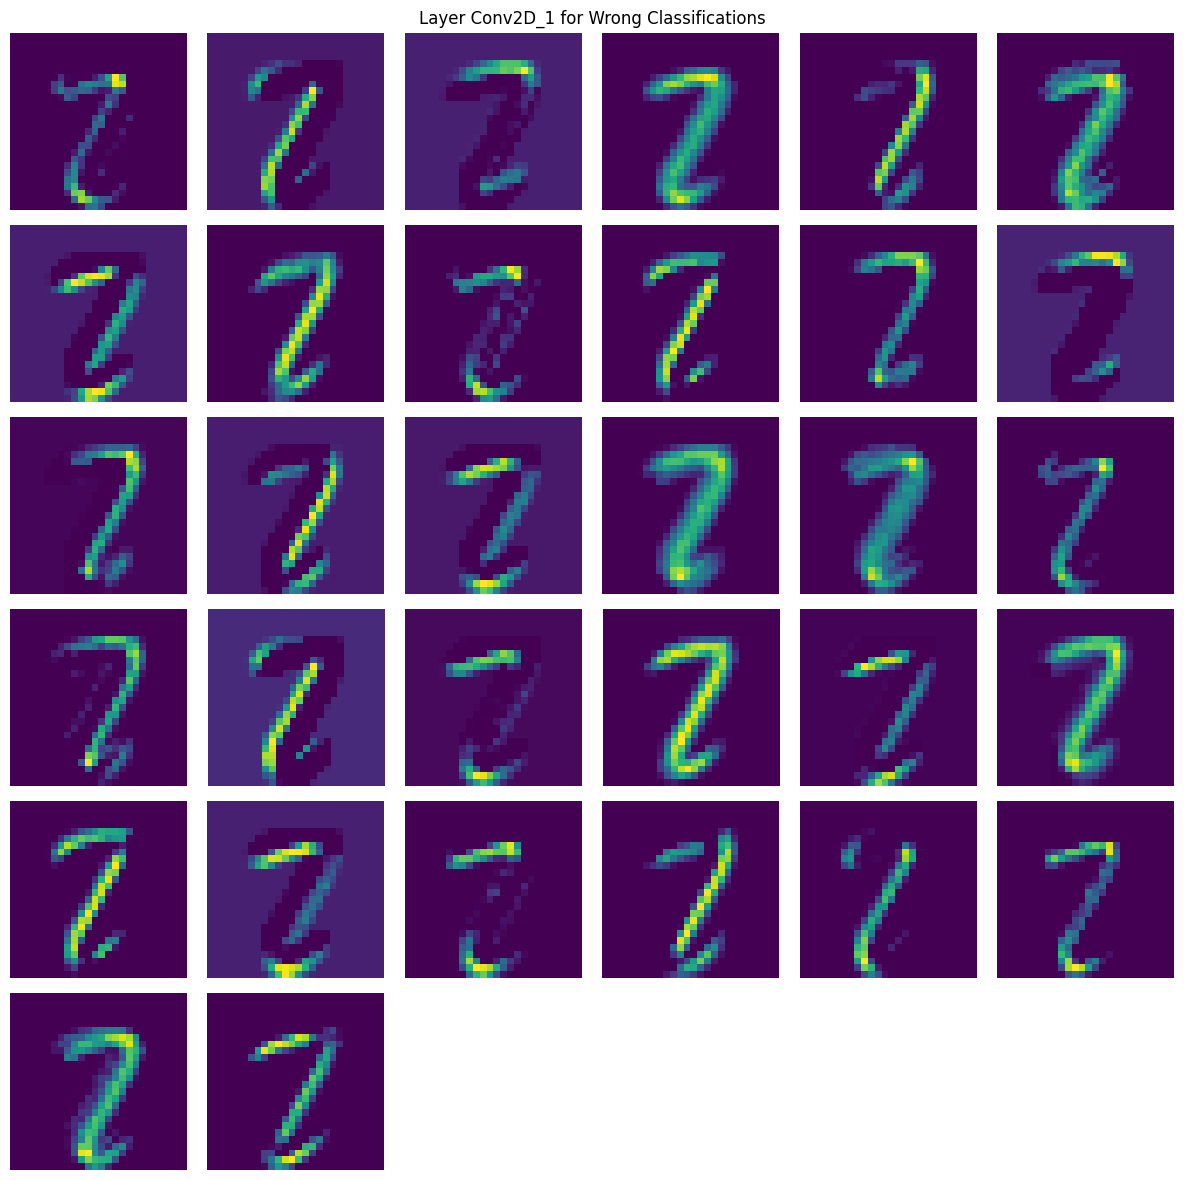

Layer 2 feature map shape: (1, 11, 11, 64)


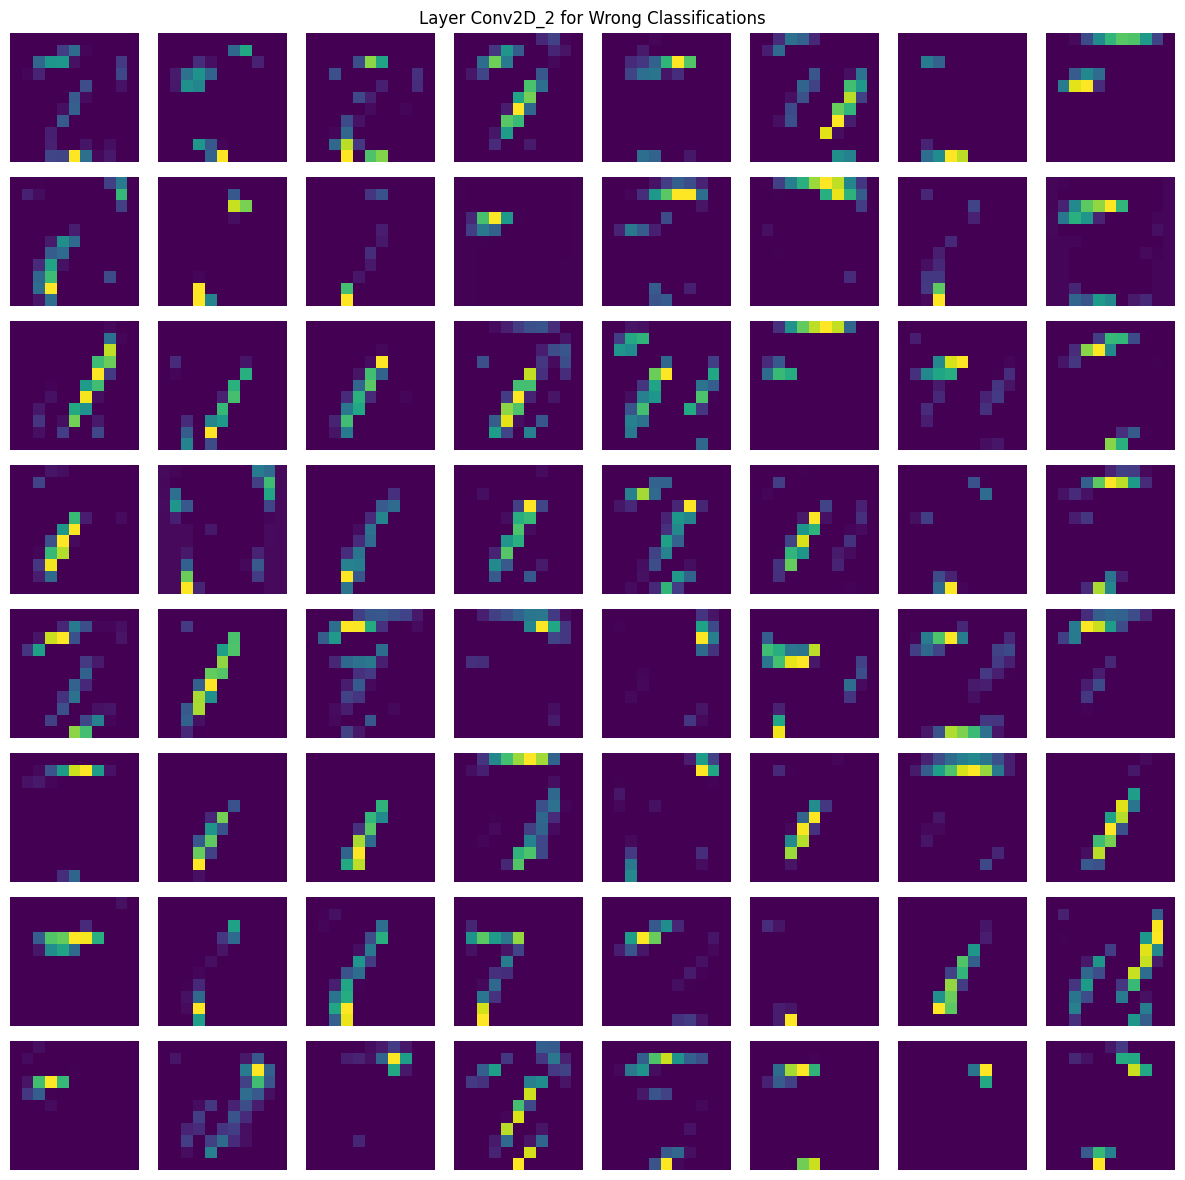

In [9]:
from math import ceil

def show_feature_maps(index,title,label,predict):
  layer_outputs = [layer.output for layer in model.layers if 'Conv2D' in layer.name]
  feature_map_model = tf.keras.Model(inputs=model.inputs, outputs=layer_outputs)
  feature_maps = feature_map_model.predict(x_test[index].reshape(1,28,28,1))
  names = [layer.name for layer in feature_map_model.layers if 'Conv2D' in layer.name]
  print(f'Label: {label}')
  print(f'Predict: {predict}')
  # show label picture
  image = x_test[index].reshape(28,28)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(f'{title} Image')
  plt.show()
  for i, feature_map in enumerate(feature_maps):
      # number of channel
      num_channels = feature_map.shape[-1]
      # feature map size
      size = feature_map.shape[1]

      print(f"Layer {i+1} feature map shape: {feature_map.shape}")


      grid_size = ceil(num_channels ** 0.5)
      fig, ax = plt.subplots(grid_size, grid_size, figsize=(12, 12))
      fig.suptitle(f'Layer {names[i]} for {title} Classifications')

      # show picture for feature maps in one picture
      for j in range(num_channels):
          row, col = divmod(j, grid_size)
          ax[row, col].imshow(feature_map[0, :, :, j], cmap='viridis')
          ax[row, col].axis('off')
      for j in range(num_channels, grid_size**2):
          row, col = divmod(j, grid_size)
          ax[row, col].axis('off')
      plt.tight_layout()
      plt.show()

predictions = model.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
correct = np.where(predictions_labels == true_labels)[0]
wrong = np.where(predictions_labels != true_labels)[0]
show_feature_maps(correct[0],'Correct',predictions_labels[correct[0]],true_labels[correct[0]])
show_feature_maps(wrong[0],'Wrong',predictions_labels[wrong[0]],true_labels[wrong[0]])




In [10]:
l2_reg = 0.01
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation="relu",name='Conv2D_1',
                               kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation="relu",name='Conv2D_2',
                               kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax",name='Dense',
                              kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
    ]
)
model2.summary()
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.084,)
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - accuracy: 0.7464 - loss: 1.2143 - val_accuracy: 0.9643 - val_loss: 0.3752
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9404 - loss: 0.4367 - val_accuracy: 0.9657 - val_loss: 0.3517
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9456 - loss: 0.4081 - val_accuracy: 0.9685 - val_loss: 0.3380
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9463 - loss: 0.4065 - val_accuracy: 0.9710 - val_loss: 0.3366
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9476 - loss: 0.3972 - val_accuracy: 0.9690 - val_loss: 0.3369
Test loss: 0.3521089553833008
Test accuracy: 0.9641000032424927


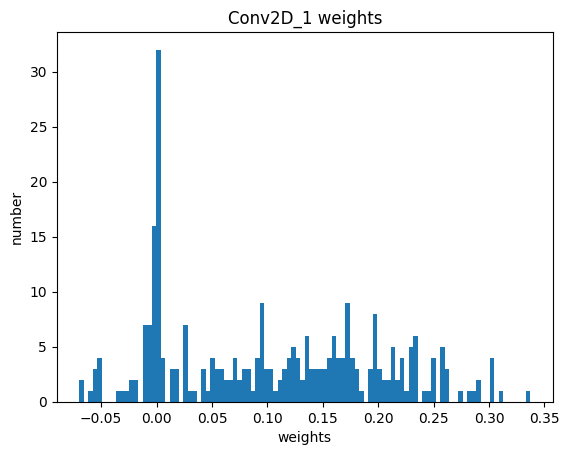

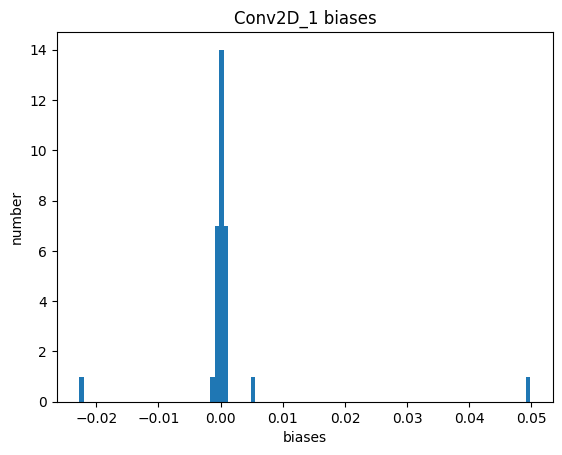

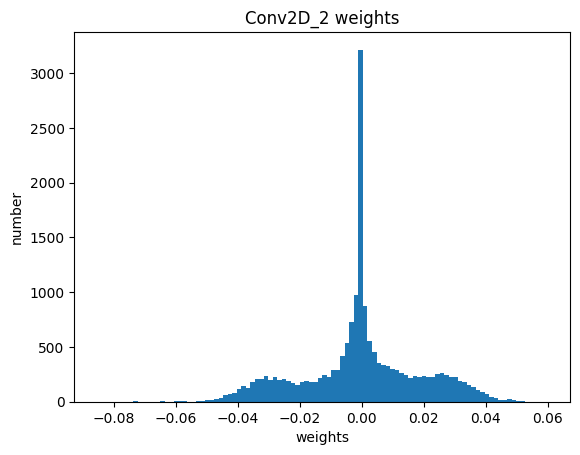

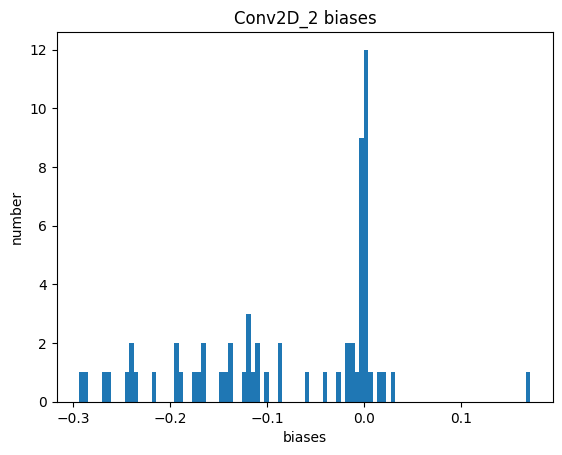

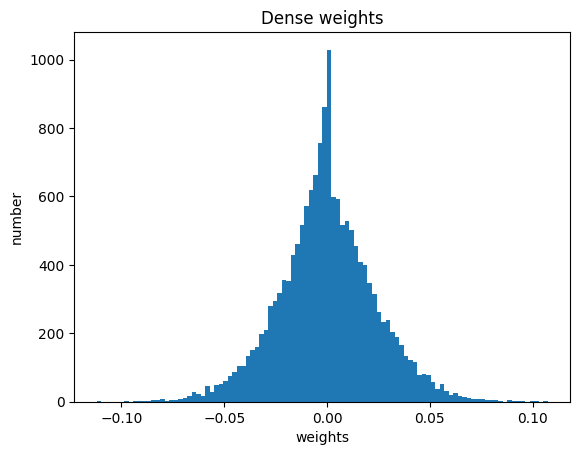

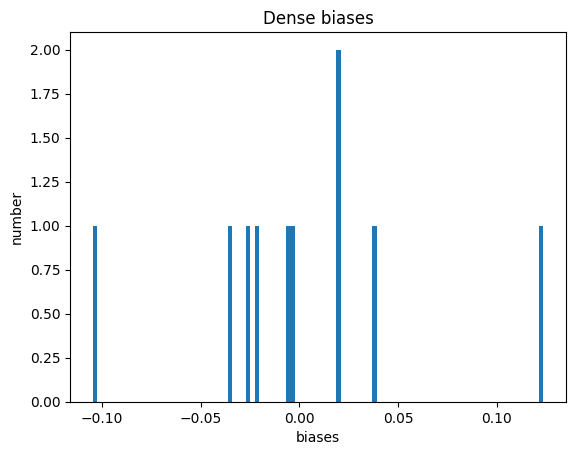

In [11]:
W = model2.get_weights()
for layer in model2.layers:
    w = layer.get_weights()
    if w:
      plt.hist(w[0].flatten(),bins=100)
      plt.title(f'{layer.name} weights')
      plt.xlabel('weights')
      plt.ylabel('number')
      plt.show()
      plt.hist(w[1].flatten(),bins=100)
      plt.title(f'{layer.name} biases')
      plt.xlabel('biases')
      plt.ylabel('number')
      plt.show()
